In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random
import seaborn as sns

### Method Of Moments

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

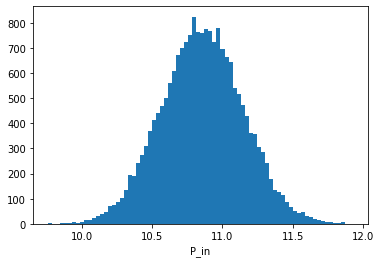

In [4]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

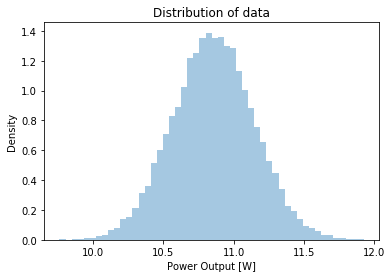

In [5]:
test = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel = "Power Output [W]", label="Density")
test.set_title('Distribution of data')
test.set_ylabel('Density')
plt.savefig('Data/Plots/hist_simulation.png')

In [6]:
from MoM_class import Method_of_Moments

In [7]:
MoM = Method_of_Moments(simulation)

In [8]:
simulation.sort()

In [9]:
dist_names = ['norm', 'beta', 'gamma', 'lognorm']
parameters = []

**Log Likelihood of FIT**

### Normal Distribution

In [10]:
params_normal = MoM.norm_from_moments()
parameters.append(params_normal)
params_normal

(10.855754143885084, 0.289212270506663)

In [11]:
np.sum(np.log(scipy.stats.norm.pdf(simulation[1:-1], *params_normal)))

-3553.577563013328

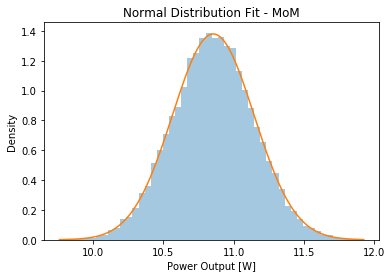

In [12]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Normal.png')

### Beta Distribution

In [13]:
params_beta = MoM.beta_from_moments()
parameters.append(params_beta)
params_beta

(6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625)

In [14]:
np.sum(np.log(scipy.stats.beta.pdf(simulation[1:-1], *params_beta)))

-3730.3395271427107

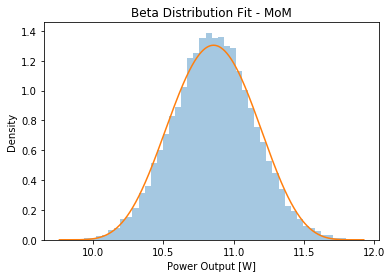

In [15]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MoM')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Beta.png')

### Gamma Distribution

In [16]:
params_gamma = MoM.gamma_from_moments()
parameters.append(params_gamma)
params_gamma

(14.252039976878569, 9.763923621594225, 0.0766087187562035)

In [17]:
### Log Likelihood
np.sum(np.log(scipy.stats.gamma.pdf(simulation[1:], *params_gamma)))

-4291.132143962901

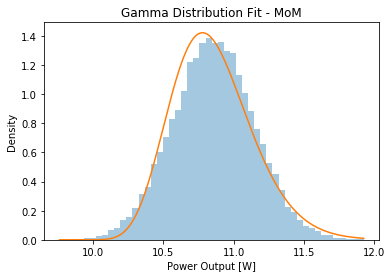

In [18]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MoM')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Gamma.png')

### LogNormal Distribution

In [19]:
params_lognorm = MoM.lognorm_from_moments()
parameters.append(params_lognorm)
params_lognorm

(0.271691047937462, 9.763923621594225, 1.0522678089321305)

In [20]:
np.sum(np.log(scipy.stats.lognorm.pdf(simulation[1:-1], *params_lognorm)))

-5325.8564613954095

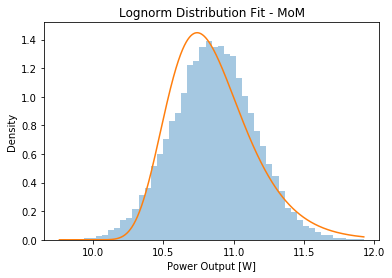

In [21]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MoM')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Lognorm.png')

In [22]:
parameters

[(10.855754143885084, 0.289212270506663),
 (6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625),
 (14.252039976878569, 9.763923621594225, 0.0766087187562035),
 (0.271691047937462, 9.763923621594225, 1.0522678089321305)]

In [23]:
results = pd.DataFrame()
results['Distribution'] = dist_names
results['Parameters'] = parameters
results

,Distribution,Parameters
0,norm,"(10.855754143885084, 0.289212270506663)"
1,beta,"(6.543229995890743, 6.402685874570016, 9.76392..."
2,gamma,"(14.252039976878569, 9.763923621594225, 0.0766..."
3,lognorm,"(0.271691047937462, 9.763923621594225, 1.05226..."


In [24]:
from helper_functions import qqplot

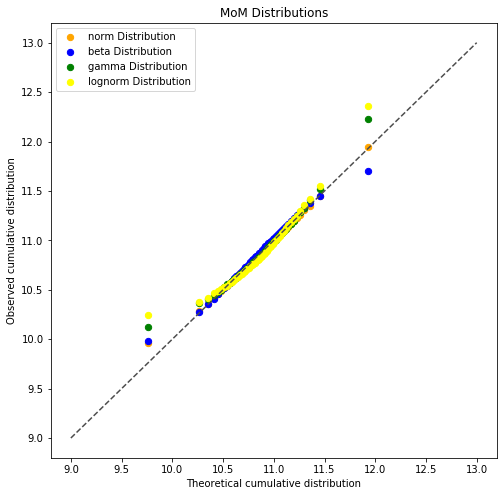

In [25]:
qqplot(simulation, results, 4,"MoM Distributions", "MoM_qq")

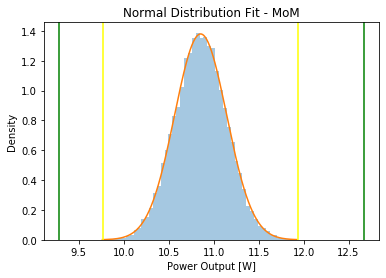

In [26]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.axvline(x=9.28592305, color='green')
plt.axvline(x=12.66975792, color='green')
plt.axvline(x=9.77066328, color='yellow')
plt.axvline(x=11.94185858, color='yellow')
plt.savefig('Data/Plots/CP.png')
plt.show()


In [27]:
params_uniform = uniform_from_moments(simulation)
params_uniform

NameError: name 'uniform_from_moments' is not defined

In [ ]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MoM')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Uniform.png')

In [ ]:
def log_likelihood_foo(data, parameters):
    return np.sum(np.log(dist.pdf(data[1:-1], *parameters)))

def get_parameters(data, method, distribution):
    if method == 'MLE':
        dist = getattr(scipy.stats, distribution)
        return dist.fit(data)
    else: #'MoM'
        MoM = Method_of_Moments(data)
        method_to_call = getattr(Method_of_Moments, distribution + '_from_moments')
        return MoM.method_to_call()